##### Libraries:
    - numpy: This is a numerical computing library.
    - pandas: This library is used for data manipulation and analysis.
    - matplotlib: This is a plotting library used for graphical representation of data.

    Magic Commands: (Commands that start with % and they belong to Jupyter Notebook)
    - %matplotlib inline: This is not an import statement but a magic command that configures the notebook to display plots inline.
    In Jupyter Notebook, when a plotting library is used, the default behavior is to display the plot separately in a new window.
    However, when we use %matplotlib inline, the plots are displayed within the notebook itself.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Terminology
Terminology is hard for someone who is not in a crypto world, so I created crypto terminology data that will explain all the terms that are going to be used.
dropna function is used to remove missing values. But, it does not modify the original DataFrame.
It returns a new DataFrame. 

In [2]:
# Read and show crypto terminology table
# When you set columns as indexes, those columns are no longer part of the actual data frame but become part of the index.
df = pd.read_csv('crypto-terminology.csv', index_col=[0,1])
# df.dropna()
df

,
Date,Indicates when the data was recorded.
Currency,Specifies the cryptocurrency(name of cryptocurrency).
Total Volume,"Indicates the trading volume, which represents the total quantity of the cryptocurrency traded during the day."
Market Cap,Market Capitalization column represents the total market value of the cryptocurrency. It is calculated by multiplying the current price (Close) by the total circulating supply of the cryptocurrency.
Price Lag,Represent the price of Bitcoin from the previous day.
Price Rolling,The average price over the past days (in our data 3 and 7 days period).
Price Rolling Standard Deviation(std),The rolling standard deviation measures the variability or volatility of the price over a set window
Bitcoin Halving,"Every 210,000 blocks, or roughly every four years, miners' rewards are cut in half."
ETF,Exchange-traded fund (ETF) is a basket of securities that trades on an exchange just like a stock does.
Bull run,"A bull market, or bull run, is defined as a period of time where the majority of investors are buying, demand outweighs supply, market confidence is at a high, and prices are rising."


#### Bitcoin Table
bitcoin table needs to be inserted, and it is important to understand the data that is going to be used.

In [3]:
# Read and show bitcoin table
df = pd.read_csv('bitcoin.csv')
df.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


#### Bitcoin Price Graph
Let's show the price of bitcoin on the graph


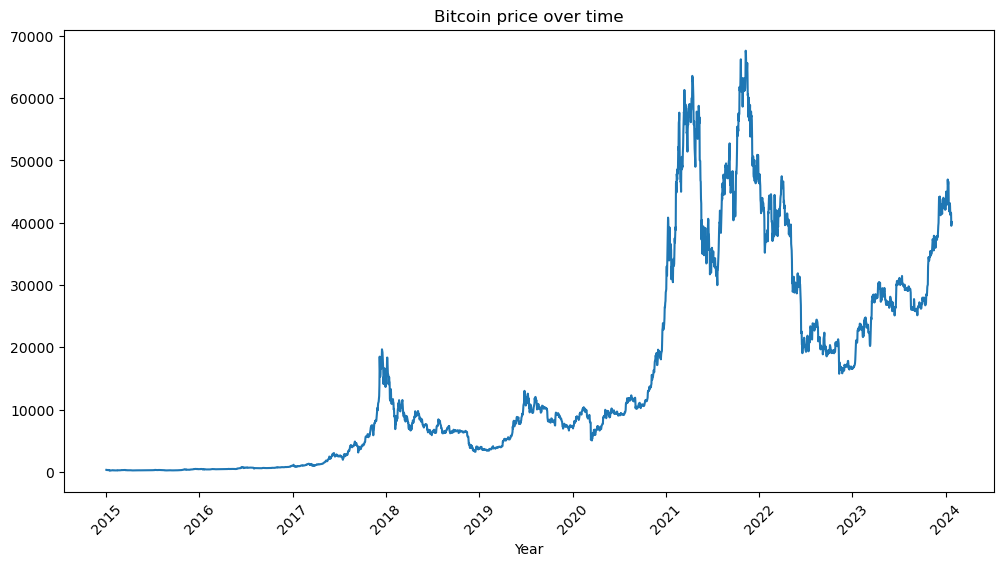

In [4]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime
df['year'] = df['date'].dt.year # new column year
years = df['year'].unique()  # Get unique years
# Get the index of the first day of each year
ticks = [df[df['year'] == year].index[0] for year in years]

# 12 & 6 are used to specify the width and height of the plot
df['price'].plot(figsize=(12,6))
plt.title("Bitcoin price over time")
plt.xlabel("Year")  # Change date to year on x-axis
plt.xticks(ticks=ticks, labels=years, rotation=45)  # Show year values on x-axis
plt.show()

#### Bull run Periods
Bull run periods are one of important factors that can affect the price of Bitcoin. The price is expected to increase during the bull run period. So, I created a list of bull run periods to be used in the analysis.

In [5]:
bull_run_periods = [
    # modify this bull run to be more precised.
    #('2011-11-01', '2013-04-01'),
    ('2017-4-16', '2017-12-16'),
    ('2020-08-10', '2021-11-01'),
    # this one is in the future
    ('2024-12-01', '2026-02-01'),
]

#### Process of adding a bull_run column to the dataframe
 process of adding a bull_run column to the dataframe and setting the value to 0 to all the rows.
Also, I printed the unique values in the bull_run column to make sure that all the values are set to 0.

In [6]:
# adding a new column to the dataframe and setting the value to 0 to all the rows
df['bull_run'] = 0
print(df['bull_run'])
# [0] means that all values in the bull_run column are set to 0.
print(df['bull_run'].unique())

0       0
1       0
2       0
3       0
4       0
       ..
3306    0
3307    0
3308    0
3309    0
3310    0
Name: bull_run, Length: 3311, dtype: int64
[0]


In [7]:
# Loop over the bull run periods and update the 'bull_run' column 
#(when the date is within a bull run period, set the value to 1)
for start, end in bull_run_periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    # select and modify specific rows (the ones that are in the bull run period)
    df.loc[(df['date'] >= start_date) & (df['date'] <= end_date), 'bull_run'] = 1


##### Checking for missing values
I am checking if there are any missing values in the dataframe. There is only one column that has missing value, which is the market_cap column. That is not a big deal, so I will fill the missing values.

In [8]:
# checking every column to see if there are any missing values
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()}")


date: 0
price: 0
total_volume: 0
market_cap: 1
coin_name: 0
year: 0
bull_run: 0


##### Market Cap missing value
I founded that the missing value is in the row with the date 02.04.2017.

In [9]:
# Find the index of the row with the missing value
missing_value_index = df[df['market_cap'].isnull()].index[0]

# Print a few rows around the missing value row
print("Before interpolation:")
print(df.iloc[missing_value_index - 2 : missing_value_index + 3])


Before interpolation:
          date        price  total_volume    market_cap coin_name  year  \
819 2017-03-31  1078.274711  1.332871e+08  1.751958e+10   bitcoin  2017   
820 2017-04-01  1085.253000  8.775043e+07  1.763483e+10   bitcoin  2017   
821 2017-04-02  1098.068000  8.023151e+07           NaN   bitcoin  2017   
822 2017-04-03  1139.308275  1.317652e+08  1.851790e+10   bitcoin  2017   
823 2017-04-04  1140.497590  1.082230e+08  1.853906e+10   bitcoin  2017   

     bull_run  
819         0  
820         0  
821         0  
822         0  
823         0  


#####  Choosing a method to fullfill the missing value.
After searching for filling missing data methods, I chose interpolation method because market_cap is time series data. interpolate function found the missing filed on it's own and inserted 1.807637e+10 value in that field. In historical snapshots I found that the actual market cap price for 02.04.2017 was $17,911,979,951.60. I chose to let interpolate function to insert it instead of me because right now I am practicing data preprocess and I want to act like it's the worst scenario(for example if there wasn't historical snapshot).

In [10]:
df['market_cap'] = df['market_cap'].interpolate()

# Print a few rows around the interpolated row
print("\nAfter interpolation:")
print(df.iloc[missing_value_index - 2 : missing_value_index + 3])



After interpolation:
          date        price  total_volume    market_cap coin_name  year  \
819 2017-03-31  1078.274711  1.332871e+08  1.751958e+10   bitcoin  2017   
820 2017-04-01  1085.253000  8.775043e+07  1.763483e+10   bitcoin  2017   
821 2017-04-02  1098.068000  8.023151e+07  1.807637e+10   bitcoin  2017   
822 2017-04-03  1139.308275  1.317652e+08  1.851790e+10   bitcoin  2017   
823 2017-04-04  1140.497590  1.082230e+08  1.853906e+10   bitcoin  2017   

     bull_run  
819         0  
820         0  
821         0  
822         0  
823         0  


#### Lags variables
I found out that in time series analysis it's a common practice to use past values (lags) of a variable to predict it's future value.

In [11]:
# Create lag version of the 'price' column
for lag in range(1, 4):  # Create lag of 1 day, 2 days, and 3 days
    df[f'price_lag_{lag}'] = df['price'].shift(lag)
    # df[f'price_lag_{lag}'] is creating a new column with the name price_lag_1,2... in df
    # shift is shifting the price column by lag number of days. For example, if lag is 1, 
    #then the price_lag_1 column will have the price of the previous day.
    


#### Unnecessary column coin_name
I realized that coin_name is unnecessary because I am only working with bitcoin. So I droped it from the df.

In [12]:
df['price_lag_1'] = df['price_lag_1'].fillna(method='bfill')
df['price_lag_2'] = df['price_lag_2'].fillna(method='bfill')
df['price_lag_3'] = df['price_lag_3'].fillna(method='bfill')
missing_values = df.isnull().sum()
missing_values

date            0
price           0
total_volume    0
market_cap      0
coin_name       0
year            0
bull_run        0
price_lag_1     0
price_lag_2     0
price_lag_3     0
dtype: int64

In [13]:
# Drop unnecessary columns
df.drop(columns=['coin_name'], inplace=True)  # coin_name has only one value(it's unnecessary)
df

,date,price,total_volume,market_cap,year,bull_run,price_lag_1,price_lag_2,price_lag_3
0,2015-01-01,313.992000,4.699936e+07,4.293958e+09,2015,0,313.992000,313.992000,313.992000
1,2015-01-02,314.446000,3.885591e+07,4.301448e+09,2015,0,313.992000,313.992000,313.992000
2,2015-01-03,286.572000,1.187789e+08,3.921358e+09,2015,0,314.446000,313.992000,313.992000
3,2015-01-04,260.936000,2.055001e+08,3.571640e+09,2015,0,286.572000,314.446000,313.992000
4,2015-01-05,273.220000,1.550381e+08,3.740880e+09,2015,0,260.936000,286.572000,314.446000
...,...,...,...,...,...,...,...,...,...
3306,2024-01-21,41626.107110,9.533488e+09,8.172176e+11,2024,0,41600.940933,41261.394798,42713.859187
3307,2024-01-22,41541.899457,8.032697e+09,8.147094e+11,2024,0,41626.107110,41600.940933,41261.394798
3308,2024-01-23,39504.730058,3.120285e+10,7.750209e+11,2024,0,41541.899457,41626.107110,41600.940933
3309,2024-01-24,39833.454105,2.968333e+10,7.791334e+11,2024,0,39504.730058,41541.899457,41626.107110


##### Adding and Calculating Price & Volume rolling mean and standard devitation (std)
Price & volume rolling mean and standard devitation are also important for price predicting. So I added them.

In [14]:
# Calculate rolling window statistics for 'price' and 'total_volume'
window_sizes = [3, 7]
for window in window_sizes:
    df[f'price_rolling_mean_{window}'] = df['price'].rolling(window=window).mean()
    df[f'price_rolling_std_{window}'] = df['price'].rolling(window=window).std()
    df[f'volume_rolling_mean_{window}'] = df['total_volume'].rolling(window=window).mean()
    df[f'volume_rolling_std_{window}'] = df['total_volume'].rolling(window=window).std()
df

,date,price,total_volume,market_cap,year,bull_run,price_lag_1,price_lag_2,price_lag_3,price_rolling_mean_3,price_rolling_std_3,volume_rolling_mean_3,volume_rolling_std_3,price_rolling_mean_7,price_rolling_std_7,volume_rolling_mean_7,volume_rolling_std_7
0,2015-01-01,313.992000,4.699936e+07,4.293958e+09,2015,0,313.992000,313.992000,313.992000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,314.446000,3.885591e+07,4.301448e+09,2015,0,313.992000,313.992000,313.992000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,286.572000,1.187789e+08,3.921358e+09,2015,0,314.446000,313.992000,313.992000,305.003333,15.963617,6.821140e+07,4.398165e+07,NaN,NaN,NaN,NaN
3,2015-01-04,260.936000,2.055001e+08,3.571640e+09,2015,0,286.572000,314.446000,313.992000,287.318000,26.762799,1.210450e+08,8.334523e+07,NaN,NaN,NaN,NaN
4,2015-01-05,273.220000,1.550381e+08,3.740880e+09,2015,0,260.936000,286.572000,314.446000,273.576000,12.821707,1.597724e+08,4.355401e+07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,2024-01-21,41626.107110,9.533488e+09,8.172176e+11,2024,0,41600.940933,41261.394798,42713.859187,41496.147614,203.690936,1.970060e+10,8.813011e+09,42105.510362,704.597840,2.028964e+10,5.430294e+09
3307,2024-01-22,41541.899457,8.032697e+09,8.147094e+11,2024,0,41626.107110,41600.940933,41261.394798,41589.649167,43.224532,1.399135e+10,9.052128e+09,42068.505595,729.617823,1.901303e+10,7.126548e+09
3308,2024-01-23,39504.730058,3.120285e+10,7.750209e+11,2024,0,41541.899457,41626.107110,41600.940933,40890.912208,1201.207080,1.625634e+10,1.296579e+10,41628.133312,1164.783152,2.023707e+10,8.462806e+09
3309,2024-01-24,39833.454105,2.968333e+10,7.791334e+11,2024,0,39504.730058,41541.899457,41626.107110,40293.361207,1093.686745,2.297296e+10,1.296093e+10,41154.626521,1116.671519,2.133139e+10,9.195775e+09


In [15]:
missing_values

date            0
price           0
total_volume    0
market_cap      0
coin_name       0
year            0
bull_run        0
price_lag_1     0
price_lag_2     0
price_lag_3     0
dtype: int64

#### Dropping NaN valued rows
If I don't delete the rows with NaN values, they will stay as outliers. There were 7 rows, so it is not that much crucial and I decided to delete them.

In [16]:
df = df.dropna()
missing_values = df.isnull().sum()
missing_values

date                     0
price                    0
total_volume             0
market_cap               0
year                     0
bull_run                 0
price_lag_1              0
price_lag_2              0
price_lag_3              0
price_rolling_mean_3     0
price_rolling_std_3      0
volume_rolling_mean_3    0
volume_rolling_std_3     0
price_rolling_mean_7     0
price_rolling_std_7      0
volume_rolling_mean_7    0
volume_rolling_std_7     0
dtype: int64

#### Checking corellations 
By checking corellations I realized that bull run data aren't that much good for price prediction as I thought.

In [17]:
# Perform a correlation analysis
correlation_matrix = df.corr()
correlation_matrix

,price,total_volume,market_cap,year,bull_run,price_lag_1,price_lag_2,price_lag_3,price_rolling_mean_3,price_rolling_std_3,volume_rolling_mean_3,volume_rolling_std_3,price_rolling_mean_7,price_rolling_std_7,volume_rolling_mean_7,volume_rolling_std_7
price,1.000000,0.654542,0.999560,0.766653,0.300619,0.998800,0.997666,0.996533,0.999348,0.687565,0.676610,0.489079,0.997798,0.771843,0.690423,0.590852
total_volume,0.654542,1.000000,0.649909,0.623222,0.291441,0.655185,0.654855,0.654262,0.655205,0.646354,0.963287,0.675324,0.654518,0.674496,0.938469,0.759912
market_cap,0.999560,0.649909,1.000000,0.774457,0.288603,0.998406,0.997300,0.996201,0.998948,0.680554,0.671852,0.489908,0.997461,0.764091,0.685623,0.591713
year,0.766653,0.623222,0.774457,1.000000,0.066261,0.766555,0.766438,0.766346,0.766952,0.443679,0.644535,0.499552,0.767381,0.504861,0.658178,0.608881
bull_run,0.300619,0.291441,0.288603,0.066261,1.000000,0.297970,0.295367,0.292797,0.298143,0.329507,0.300803,0.143937,0.293321,0.371442,0.305320,0.171808
price_lag_1,0.998800,0.655185,0.998406,0.766555,0.297970,1.000000,0.998799,0.997665,0.999726,0.688157,0.677173,0.490007,0.998658,0.772387,0.690841,0.590567
price_lag_2,0.997666,0.654855,0.997300,0.766438,0.295367,0.998799,1.000000,0.998799,0.999348,0.688960,0.677383,0.490747,0.999171,0.772983,0.691069,0.589815
price_lag_3,0.996533,0.654262,0.996201,0.766346,0.292797,0.997665,0.998799,1.000000,0.998191,0.690366,0.677284,0.492702,0.999343,0.773777,0.691218,0.589778
price_rolling_mean_3,0.999348,0.655205,0.998948,0.766952,0.298143,0.999726,0.999348,0.998191,1.000000,0.688589,0.677412,0.490202,0.999068,0.772811,0.691141,0.590722
price_rolling_std_3,0.687565,0.646354,0.680554,0.443679,0.329507,0.688157,0.688960,0.690366,0.688589,1.000000,0.610716,0.497615,0.690211,0.788366,0.585273,0.528550


#### dependent & independent variables
Next step was to sort dependent & independent variables

In [18]:
# The dependent variable
y = df['price']
# The independent variables
# assigning data frame without the price column
# axis=1 means that we are dropping the column, if we want row then axis=0
X = df.drop(['price'], axis=1)


In [19]:
# Calculate first quartile
Q1 = df['price'].quantile(0.25)
# Calculate third quartile
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for what is considered an outlier (growing the median zone)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


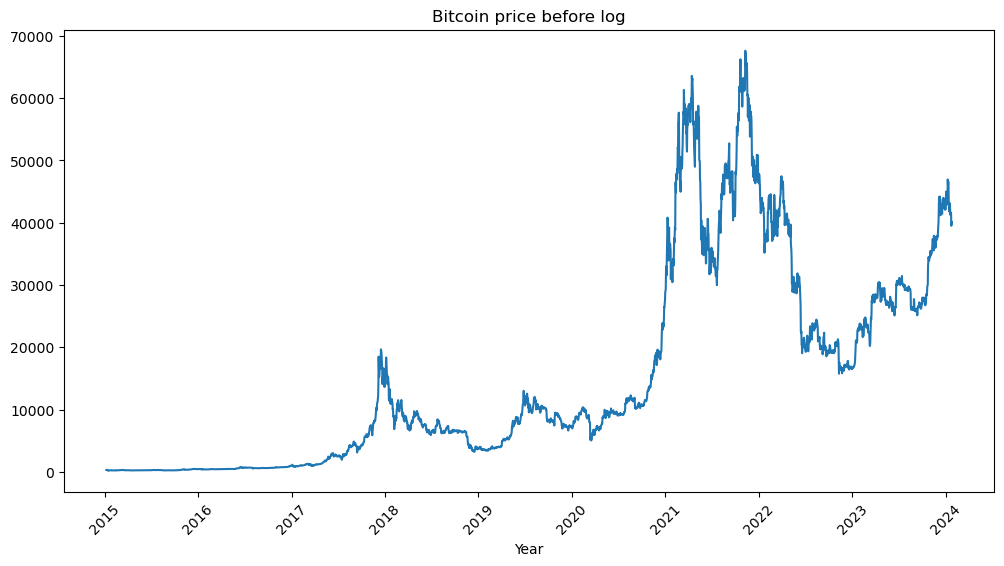

In [20]:
# 12 & 6 are used to specify the width and height of the plot
df['price'].plot(figsize=(12,6))
plt.title("Bitcoin price before log")
plt.xlabel("Year")  # Change date to year on x-axis
plt.xticks(ticks=ticks, labels=years, rotation=45)  # Show year values on x-axis
plt.show()

In [21]:
# creating a copy of the dataframe object
df_log_transformed = df.copy()
df_log_transformed['price'] = np.log1p(df['price'])
df_log_transformed['price']
# should show the price of bitcoin here. ALso somewhere before log1p function.

6        5.693303
7        5.654076
8        5.671858
9        5.618707
10       5.591673
          ...    
3306    10.636507
3307    10.634482
3308    10.584201
3309    10.592487
3310    10.599747
Name: price, Length: 3305, dtype: float64

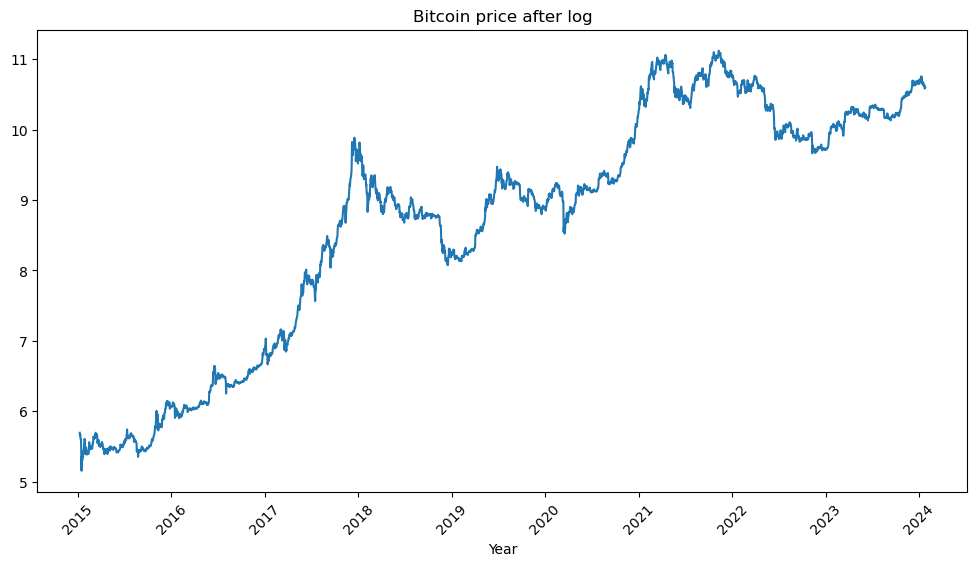

In [22]:
# 12 & 6 are used to specify the width and height of the plot
df_log_transformed['price'].plot(figsize=(12,6))
plt.title("Bitcoin price after log")
plt.xlabel("Year")  # Change date to year on x-axis
plt.xticks(ticks=ticks, labels=years, rotation=45)  # Show year values on x-axis
plt.show()

#### Setting 80% 20% for data splitting
20 % (0.2) will be test_size (dataset reserved for testing)
80% (1 - test_size (which is 0.8)) is going to be dataset used for training

In [23]:
# For time-series,  it need to split the data in a way that respects the time order
# Decide on the size of the test set
test_size = 0.2  # (20% of rows in the dataframe)
# Compute the index at which to split (80% of rows in dataframe)
split_index = int((1 - test_size) * len(df))

#### Spliting data for training

In [24]:
# Split the features and target variable into training/testing sets
feature_train, feature_test = X[:split_index], X[split_index:]
price_train, price_test = y[:split_index], y[split_index:]
price_test

2650    46622.635713
2651    45635.454381
2652    43198.775269
2653    43515.150323
2654    42315.709724
            ...     
3306    41626.107110
3307    41541.899457
3308    39504.730058
3309    39833.454105
3310    40123.671058
Name: price, Length: 661, dtype: float64

In [25]:
# Saving the DataFrame as a CSV file
df.to_csv('bitcoin_modified.csv', index=False)

# The path to the saved CSV file
csv_file_path = '/mnt/data/bitcoin_modified.csv'
csv_file_path

'/mnt/data/bitcoin_modified.csv'